# Basic Imports

In [37]:
# Basic Imports
import sys
sys.path.insert(1, "../")

import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Evaluation Imports
from sklearn.metrics import mean_squared_error
from math import sqrt

In [38]:
# Configurations
isDemoMode = True
DATA_FILE_NAME = '../Data/final_crypto_data.csv'
SELECTED_MONTHS = [10,11,12,1,2,3]

 ### Update Default number of DF columns

In [39]:
print(f"Default number of DF columns displayed {pd.get_option('display.max_columns')}")

# settings to display all columns
pd.set_option("display.max_columns", None)

Default number of DF columns displayed None


# Load Test data from CSV

In [40]:
df = pd.read_csv(DATA_FILE_NAME)
df

,Unnamed: 0,_id,high_24h,last_24h,unix_timestamp,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
0,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,1635527368,62559.74,60908.08,5113.537402,56425.0,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
1,1,627127fabbd592fa2c7f25aa,62971.54,62580.05,1635527309,62571.40,60907.24,5111.938615,56425.0,62580.05,60608.95,62580.05,0.046548,62555.88,62577.47,62555.88,21000000.0,18858012.0,18858012.0,62530.948307,4.305221e+10,6.0179,-0.422853,2.137546,2.146984,26.873643,29.917416,49.972913,1.179209e+12,43.4826,1.313150e+12,0.000834
2,2,627127fabbd592fa2c7f25ab,62971.54,62591.17,1635527428,62582.19,60908.89,5115.569587,56425.0,62596.03,60608.95,62597.65,2.112533,62555.02,62597.64,62560.95,21000000.0,18858012.0,18858012.0,62551.924819,4.304739e+10,6.0643,-0.365020,2.383982,2.150485,26.873643,29.997052,49.972913,1.179605e+12,43.4826,1.313590e+12,0.000834
3,3,627127fabbd592fa2c7f25ac,62971.54,62590.43,1635527672,62572.06,60909.91,5117.061581,56425.0,62590.43,60608.95,62615.00,0.596406,62590.43,62590.43,62603.62,21000000.0,18858012.0,18858012.0,62591.537709,4.311295e+10,6.1673,-0.311393,2.375399,2.464668,26.873643,30.044297,49.972913,1.180352e+12,43.4826,1.314422e+12,0.000834
4,4,627127fabbd592fa2c7f25ad,62971.54,62600.43,1635527551,62587.09,60909.54,5117.193435,56425.0,62606.26,60608.95,62600.43,0.657752,62577.18,62600.43,62577.18,21000000.0,18858012.0,18858012.0,62584.316178,4.310036e+10,6.1706,-0.379612,2.422122,2.443523,26.873643,30.074340,49.972913,1.180216e+12,43.4826,1.314271e+12,0.000834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246786,246786,62712800bbd592fa2c82e9ab,38786.95,38327.07,1651352348,38304.93,38539.95,566.041421,38160.4,38326.82,38599.30,38327.07,0.000650,38327.07,38327.07,38327.07,21000000.0,19026825.0,19026825.0,38334.504957,2.115848e+10,-24.4114,-0.363037,-0.606400,-3.693057,-16.314320,-12.909292,1.689268,7.293839e+11,42.0516,8.050246e+11,0.000800
246787,246787,62712800bbd592fa2c82e9ac,38786.95,38332.23,1651352290,38314.66,38539.96,566.041421,38160.4,38335.17,38599.30,38332.23,0.000000,38332.23,38332.23,38332.23,21000000.0,19026825.0,19026825.0,38332.043361,2.114067e+10,-24.4769,-0.344114,-0.592877,-3.713096,-16.308426,-12.839252,1.692403,7.293371e+11,42.0489,8.049729e+11,0.000800
246788,246788,62712800bbd592fa2c82e9ad,38786.95,38329.94,1651352410,38317.93,38539.93,566.041421,38160.4,38330.19,38599.30,38317.93,0.007191,38317.93,38317.93,38317.93,21000000.0,19026825.0,19026825.0,38337.264339,2.115928e+10,-24.4040,-0.345789,-0.598362,-3.683293,-16.296175,-12.917047,1.698228,7.294364e+11,42.0546,8.050826e+11,0.000800
246789,246789,62712800bbd592fa2c82e9ae,38786.95,38344.79,1651352469,38321.67,38539.90,566.041421,38160.4,38344.79,38599.30,38344.79,0.000000,38344.79,38344.79,38344.79,21000000.0,19026825.0,19026825.0,38334.446382,2.115736e+10,-24.4076,-0.354289,-0.602308,-3.686438,-16.303936,-12.928782,1.698071,7.293828e+11,42.0515,8.050234e+11,0.000800


In [41]:
# Drop unnecessary columns
df = utils.setDateTimeAsIndex(df)
df = utils.filterInMonths(df, SELECTED_MONTHS)
df

,Unnamed: 0,_id,high_24h,last_24h,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 17:09:28,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,62559.74,60908.08,5113.537402,56425.0,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
2021-10-29 17:08:29,1,627127fabbd592fa2c7f25aa,62971.54,62580.05,62571.40,60907.24,5111.938615,56425.0,62580.05,60608.95,62580.05,0.046548,62555.88,62577.47,62555.88,21000000.0,18858012.0,18858012.0,62530.948307,4.305221e+10,6.0179,-0.422853,2.137546,2.146984,26.873643,29.917416,49.972913,1.179209e+12,43.4826,1.313150e+12,0.000834
2021-10-29 17:10:28,2,627127fabbd592fa2c7f25ab,62971.54,62591.17,62582.19,60908.89,5115.569587,56425.0,62596.03,60608.95,62597.65,2.112533,62555.02,62597.64,62560.95,21000000.0,18858012.0,18858012.0,62551.924819,4.304739e+10,6.0643,-0.365020,2.383982,2.150485,26.873643,29.997052,49.972913,1.179605e+12,43.4826,1.313590e+12,0.000834
2021-10-29 17:14:32,3,627127fabbd592fa2c7f25ac,62971.54,62590.43,62572.06,60909.91,5117.061581,56425.0,62590.43,60608.95,62615.00,0.596406,62590.43,62590.43,62603.62,21000000.0,18858012.0,18858012.0,62591.537709,4.311295e+10,6.1673,-0.311393,2.375399,2.464668,26.873643,30.044297,49.972913,1.180352e+12,43.4826,1.314422e+12,0.000834
2021-10-29 17:12:31,4,627127fabbd592fa2c7f25ad,62971.54,62600.43,62587.09,60909.54,5117.193435,56425.0,62606.26,60608.95,62600.43,0.657752,62577.18,62600.43,62577.18,21000000.0,18858012.0,18858012.0,62584.316178,4.310036e+10,6.1706,-0.379612,2.422122,2.443523,26.873643,30.074340,49.972913,1.180216e+12,43.4826,1.314271e+12,0.000834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29 15:03:51,206562,627127ffbbd592fa2c824c8b,48234.00,47841.78,47821.47,47686.37,2055.574837,46897.0,47841.83,47152.38,47841.78,0.032706,47779.93,47841.78,47787.41,21000000.0,18997287.0,18997287.0,47796.800709,3.593814e+10,-11.6642,0.220574,0.405000,11.727515,23.065838,29.951735,-0.127362,9.080095e+11,41.9541,1.003733e+12,-0.260219
2022-03-29 15:02:51,206563,627127ffbbd592fa2c824c8c,48234.00,47817.06,47781.38,47686.37,2055.589733,46897.0,47804.30,47152.38,47839.85,1.175399,47817.06,47817.06,47823.15,21000000.0,18997287.0,18997287.0,47796.800709,3.593814e+10,-11.6642,0.220574,0.405000,11.727515,23.065838,29.951735,-0.127362,9.080095e+11,41.9541,1.003733e+12,-0.329272
2022-03-29 15:04:51,206564,627127ffbbd592fa2c824c8d,48234.00,47839.81,47813.47,47686.46,2054.541798,46897.0,47834.63,47152.38,47842.74,0.016080,47839.81,47839.81,47842.74,21000000.0,18997287.0,18997287.0,47758.428512,3.581643e+10,-11.9431,0.088208,0.447990,11.702487,23.073256,29.909264,-0.197507,9.072806e+11,41.9258,1.002927e+12,-0.260219


# Print the number of Dataset observations.


In [42]:
len(df)

206567

# Plot Last minute Close price

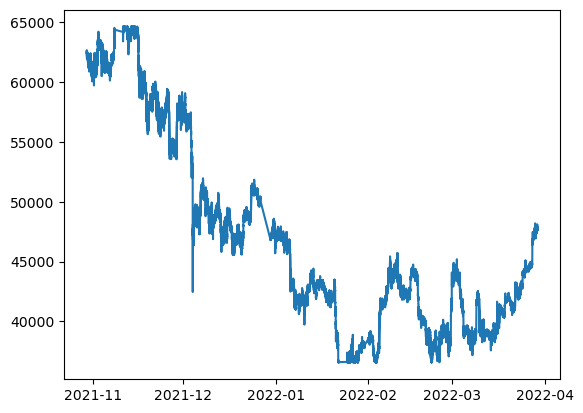

In [43]:
plt.plot(df.index, df['close_1min'] )
plt.show()

# Plot Last minute open price


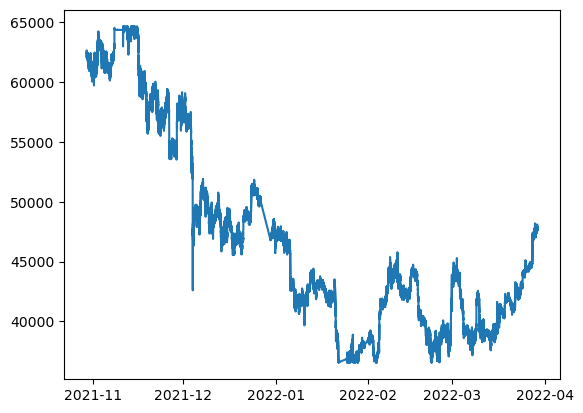

In [44]:
plt.plot(df.index, df['open_1min'] )
plt.show()

# Bitcont Price Predicition Preperations

Gia na pragmatopoisoume provlepsi tis timis tou bitcoin tha xtrisimopoiisoume tin timi **`close_1min`** prokoimenou na
provlepsoume me tin timi me tin opoia tha klisi to BTC sto epomeno lepto.

Gia na ekpedeusoume kai na dokimasoume ta montela mas tha xorisoume to dataset mas se 2 yposinola
- train_set: to opoio tha periexei to 90% ton paratirisewn
- test_set: to opoio tha periexei to 10% ton paratirisewn.

In [45]:
n_steps = 15
X, y = utils.split_sequence(df['close_1min'], n_steps)
X

array([[62561.86, 62577.47, 62597.64, ..., 62525.3 , 62636.31, 62622.96],
       [62577.47, 62597.64, 62590.43, ..., 62636.31, 62622.96, 62531.42],
       [62597.64, 62590.43, 62600.43, ..., 62622.96, 62531.42, 62630.83],
       ...,
       [47816.63, 47874.67, 47848.79, ..., 47846.27, 47841.78, 47817.06],
       [47874.67, 47848.79, 47850.35, ..., 47841.78, 47817.06, 47839.81],
       [47848.79, 47850.35, 47853.63, ..., 47817.06, 47839.81, 47852.52]])

In [46]:
train_X, train_y, valid_X, valid_y, _, _ = utils.train_test_valid_split(
        X,
        y,
        train_size=0.8,
        valid_size=0.1
    )
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
# print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
165241
165241
20655
20655
20656
20656
----------------------------------------
----------------------------
-------- Train X: (165241, 15), Train y: (165241,) --------
-------- Valid X: (20655, 15), Valid y: (20655,) --------
----------------------------



# Display training and test Data.

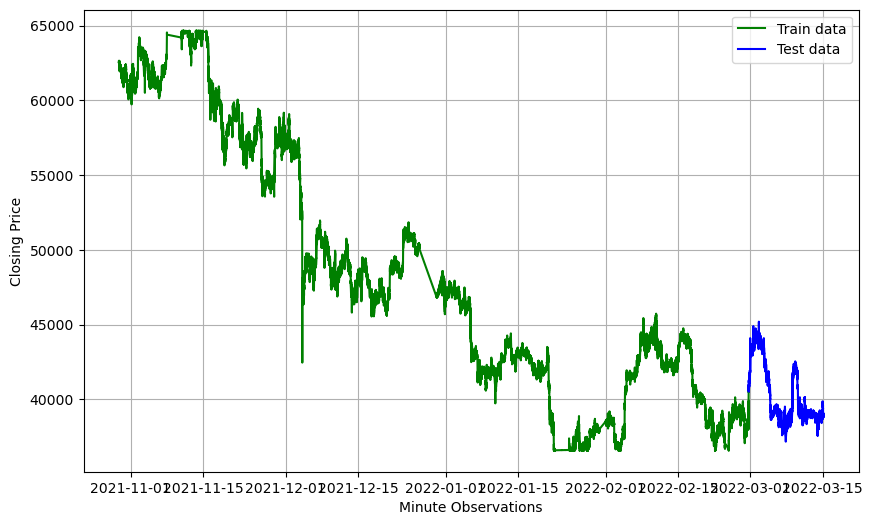

In [47]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(df[0:len(train_y)]["close_1min"], 'green', label='Train data')
plt.plot(df[len(train_y):len(train_y)+len(valid_y)]["close_1min"], 'blue', label='Test data')
plt.legend()

# Create ARIMA benchmark model

 Gia tin provlepsi tha dimiourgisoume ena ARIMA model taksis:
 - AR: 4
 - I: 1
 - MA: 0

To sigkekrimeno montelo tha xisimopoiithei gia na provlepsei ola ta testing data.
Meta apo kathe provlepsei tha enimeronoume to training_set prosthetontas kathe fora to actual price
prokoimenou na einai egkiro to montelo mas stin epomeni provlepsi.

In [48]:
# Fit the ARIMA model to the training data
model = sm.tsa.ARIMA(df["close_1min"], order=(4,1,0))
results = model.fit()

/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             close_1min   No. Observations:               206567
Model:                 ARIMA(4, 1, 0)   Log Likelihood            -1166078.062
Date:                Sat, 07 Jan 2023   AIC                        2332166.124
Time:                        23:21:06   BIC                        2332217.316
Sample:                             0   HQIC                       2332181.170
                             - 206567                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4832      0.000  -1317.753      0.000      -0.484      -0.483
ar.L2         -0.1933      0.001   -378.914      0.000      -0.194      -0.192
ar.L3         -0.0661      0.001   -118.929      0.000      -0.067      -0.065
ar.L4         -0.0078      0.000    -16.207      0.000      -0.009      -0.007
sigma2      4685.5495      2.068   2265.652      0.000    4681.496    4689.603
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         103875865.16
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                       112.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             close_1min   No. Observations:               206567
Model:                 ARIMA(4, 1, 0)   Log Likelihood            -1166078.062
Date:                Sat, 07 Jan 2023   AIC                        2332166.124
Time:                        23:21:38   BIC                        2332217.316
Sample:                             0   HQIC                       2332181.170
                             - 206567                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4832      0.000  -1317.753      0.000      -0.484      -0.483
ar.L2         -0.1933      0.001   -378.914      0.000      -0.194      -0.192
ar.L3         -0.0661      0.001   -118.929      0.000      -0.067      -0.065
ar.L4         -0.0078      0.000    -16.207      0.000      -0.009      -0.007
sigma2      4685.5495      2.068   2265.652      0.000    4681.496    4689.603
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         103875865.16
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                       112.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
predictions = results.predict(start=len(train_X), end=(len(df)-1))
predictions

datetime
2022-02-28 15:37:52    40598.763244
2022-02-28 15:38:53    40606.710657
2022-02-28 15:39:53    40644.844371
2022-02-28 15:40:53    40639.150030
2022-02-28 15:41:53    40632.321053
                           ...     
2022-03-29 15:03:51    47844.699369
2022-03-29 15:02:51    47843.347617
2022-03-29 15:04:51    47829.783152
2022-03-29 14:54:46    47833.889262
2022-03-29 14:57:47    47843.650007
Name: predicted_mean, Length: 41326, dtype: float64

datetime
2022-02-28 15:37:52    40598.763244
2022-02-28 15:38:53    40606.710657
2022-02-28 15:39:53    40644.844371
2022-02-28 15:40:53    40639.150030
2022-02-28 15:41:53    40632.321053
                           ...     
2022-03-29 15:03:51    47844.699369
2022-03-29 15:02:51    47843.347617
2022-03-29 15:04:51    47829.783152
2022-03-29 14:54:46    47833.889262
2022-03-29 14:57:47    47843.650007
Name: predicted_mean, Length: 41326, dtype: float64

In [51]:
valid_y

array([40725.49, 40721.79, 40714.55, ..., 38933.85, 39024.36, 38946.2 ])

array([40725.49, 40721.79, 40714.55, ..., 38933.85, 39024.36, 38946.2 ])

In [52]:
# calculating prediction error.
# calculate RMSE
rmse = sqrt(mean_squared_error(df[len(train_X):len(df)]['close_1min'], predictions))
print('RNSE error = %.3f ' %rmse)

RNSE error = 58.457 
RNSE error = 58.457 


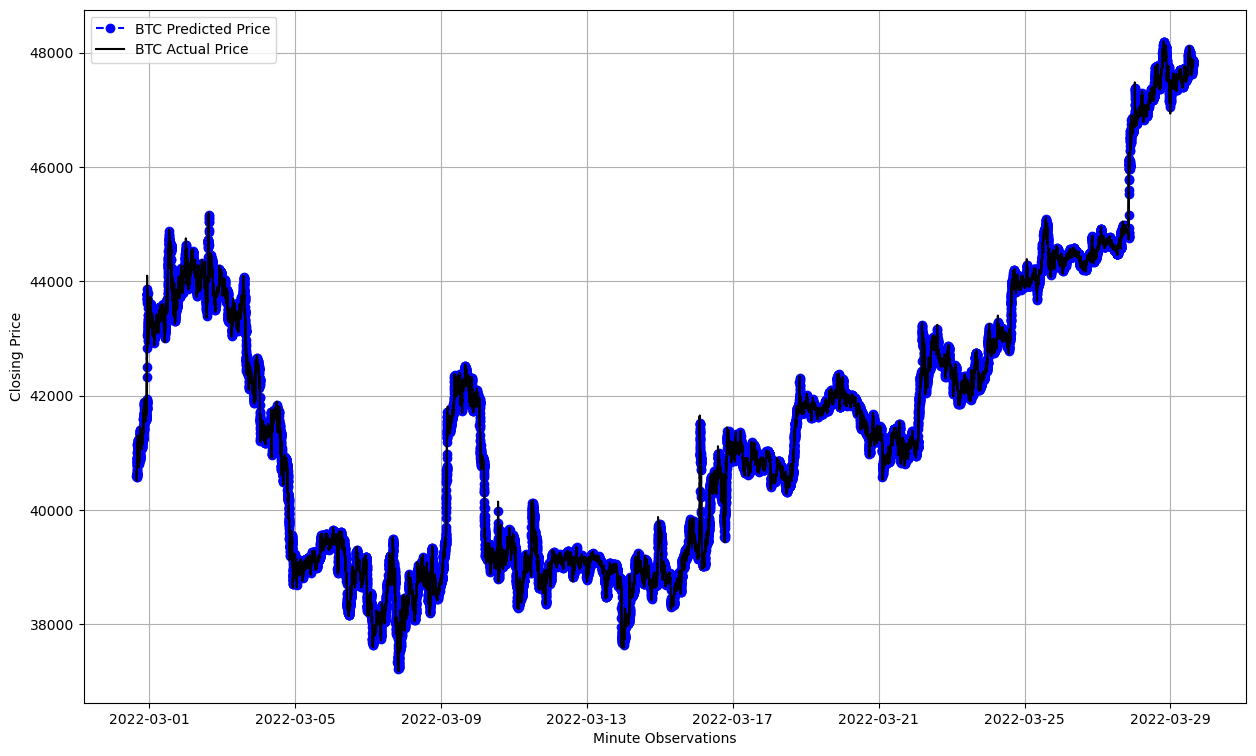

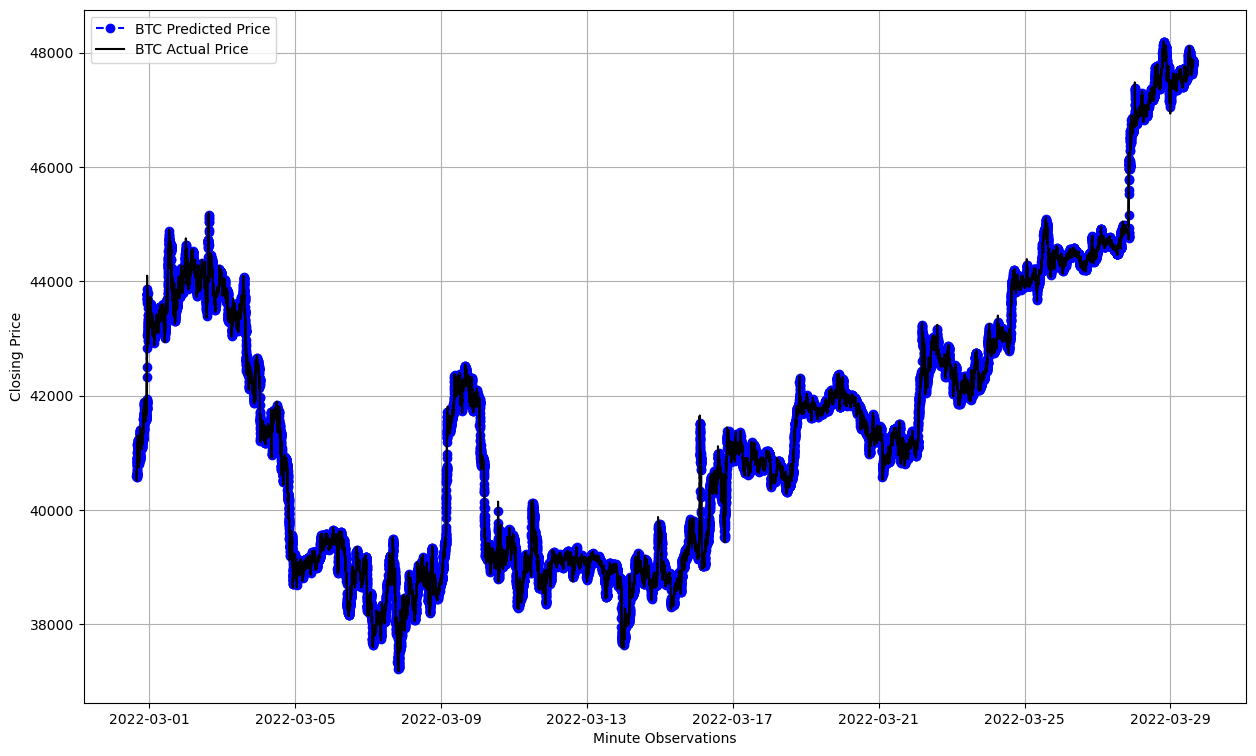

In [53]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[len(train_y):len(train_y)+len(valid_y)].index

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(predictions, color='blue', marker="o", linestyle="dashed", label='BTC Predicted Price')
plt.plot(df[len(train_X):len(df)]['close_1min'], 'black', label='BTC Actual Price')
plt.legend()

In [54]:
df_15_min = df[::15]
df_15_min

,Unnamed: 0,_id,high_24h,last_24h,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 17:09:28,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,62559.74,60908.08,5113.537402,56425.0,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
2021-10-29 17:15:31,15,627127fabbd592fa2c7f25b8,62971.54,62541.28,62531.62,60915.95,5121.220901,56425.0,62550.96,60608.95,62554.21,1.382506,62486.12,62531.42,62513.02,21000000.0,18858012.0,18858012.0,62541.599745,4.311201e+10,6.1111,-0.366133,2.361134,2.388851,26.873643,29.945589,49.972913,1.179410e+12,43.4826,1.313374e+12,0.000834
2021-10-29 17:41:40,30,627127fabbd592fa2c7f25c7,62971.54,62505.02,62496.24,60950.29,5200.503262,56425.0,62502.94,60608.95,62552.18,0.299922,62505.02,62516.47,62552.18,21000000.0,18858012.0,18858012.0,62525.760363,4.288535e+10,4.7327,-0.021597,2.406680,2.941529,26.873643,29.810102,49.972913,1.179112e+12,43.4826,1.313041e+12,0.123475
2021-10-29 17:55:48,45,627127fabbd592fa2c7f25d6,62971.54,62385.18,62384.03,60959.83,5218.017958,56425.0,62399.55,60608.95,62397.39,0.104318,62366.89,62385.18,62397.39,21000000.0,18858012.0,18858012.0,62363.738108,4.286657e+10,4.5434,-0.543703,2.119603,2.870641,26.873643,29.471630,49.972913,1.176056e+12,43.4826,1.309639e+12,0.262691
2021-10-29 18:09:54,60,627127fabbd592fa2c7f25e5,62971.54,62397.10,62394.14,60962.99,5204.297994,56425.0,62404.25,60608.95,62407.86,3.846862,62368.24,62397.57,62385.41,21000000.0,18858012.0,18858012.0,62376.389918,4.263720e+10,4.0919,-0.280623,1.947506,2.811090,26.873643,29.034676,49.972913,1.176295e+12,43.4826,1.309904e+12,0.044513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29 14:03:04,206505,627127ffbbd592fa2c824c52,48234.00,47760.31,47744.40,47676.69,2129.884259,46897.0,47761.11,47152.38,47744.40,0.007683,47744.40,47744.40,47744.40,21000000.0,18997168.0,18997168.0,47688.687392,3.631643e+10,-7.8497,-0.324590,0.068476,11.349490,22.010434,29.295506,0.745302,9.059500e+11,42.0638,1.001462e+12,0.567486
2022-03-29 14:20:16,206520,627127ffbbd592fa2c824c61,48234.00,47708.53,47688.30,47679.37,2090.539455,46897.0,47708.53,47152.38,47708.53,0.002850,47708.53,47708.53,47708.53,21000000.0,18997287.0,18997287.0,47675.442538,3.609768e+10,-9.1578,-0.277283,0.344834,11.117794,22.246273,28.904939,0.746298,9.057041e+11,42.0252,1.001184e+12,0.598674
2022-03-29 14:33:28,206535,627127ffbbd592fa2c824c70,48234.00,47799.42,47789.02,47684.28,2059.912763,46897.0,47815.63,47152.38,47850.25,0.998933,47799.42,47799.42,47850.25,21000000.0,18997287.0,18997287.0,47770.191325,3.597707e+10,-10.3213,-0.050085,0.519339,11.280486,22.528584,29.015888,0.868753,9.075040e+11,42.0490,1.003174e+12,0.411539


,Unnamed: 0,_id,high_24h,last_24h,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 17:09:28,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,62559.74,60908.08,5113.537402,56425.0,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
2021-10-29 17:15:31,15,627127fabbd592fa2c7f25b8,62971.54,62541.28,62531.62,60915.95,5121.220901,56425.0,62550.96,60608.95,62554.21,1.382506,62486.12,62531.42,62513.02,21000000.0,18858012.0,18858012.0,62541.599745,4.311201e+10,6.1111,-0.366133,2.361134,2.388851,26.873643,29.945589,49.972913,1.179410e+12,43.4826,1.313374e+12,0.000834
2021-10-29 17:41:40,30,627127fabbd592fa2c7f25c7,62971.54,62505.02,62496.24,60950.29,5200.503262,56425.0,62502.94,60608.95,62552.18,0.299922,62505.02,62516.47,62552.18,21000000.0,18858012.0,18858012.0,62525.760363,4.288535e+10,4.7327,-0.021597,2.406680,2.941529,26.873643,29.810102,49.972913,1.179112e+12,43.4826,1.313041e+12,0.123475
2021-10-29 17:55:48,45,627127fabbd592fa2c7f25d6,62971.54,62385.18,62384.03,60959.83,5218.017958,56425.0,62399.55,60608.95,62397.39,0.104318,62366.89,62385.18,62397.39,21000000.0,18858012.0,18858012.0,62363.738108,4.286657e+10,4.5434,-0.543703,2.119603,2.870641,26.873643,29.471630,49.972913,1.176056e+12,43.4826,1.309639e+12,0.262691
2021-10-29 18:09:54,60,627127fabbd592fa2c7f25e5,62971.54,62397.10,62394.14,60962.99,5204.297994,56425.0,62404.25,60608.95,62407.86,3.846862,62368.24,62397.57,62385.41,21000000.0,18858012.0,18858012.0,62376.389918,4.263720e+10,4.0919,-0.280623,1.947506,2.811090,26.873643,29.034676,49.972913,1.176295e+12,43.4826,1.309904e+12,0.044513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29 14:03:04,206505,627127ffbbd592fa2c824c52,48234.00,47760.31,47744.40,47676.69,2129.884259,46897.0,47761.11,47152.38,47744.40,0.007683,47744.40,47744.40,47744.40,21000000.0,18997168.0,18997168.0,47688.687392,3.631643e+10,-7.8497,-0.324590,0.068476,11.349490,22.010434,29.295506,0.745302,9.059500e+11,42.0638,1.001462e+12,0.567486
2022-03-29 14:20:16,206520,627127ffbbd592fa2c824c61,48234.00,47708.53,47688.30,47679.37,2090.539455,46897.0,47708.53,47152.38,47708.53,0.002850,47708.53,47708.53,47708.53,21000000.0,18997287.0,18997287.0,47675.442538,3.609768e+10,-9.1578,-0.277283,0.344834,11.117794,22.246273,28.904939,0.746298,9.057041e+11,42.0252,1.001184e+12,0.598674
2022-03-29 14:33:28,206535,627127ffbbd592fa2c824c70,48234.00,47799.42,47789.02,47684.28,2059.912763,46897.0,47815.63,47152.38,47850.25,0.998933,47799.42,47799.42,47850.25,21000000.0,18997287.0,18997287.0,47770.191325,3.597707e+10,-10.3213,-0.050085,0.519339,11.280486,22.528584,29.015888,0.868753,9.075040e+11,42.0490,1.003174e+12,0.411539


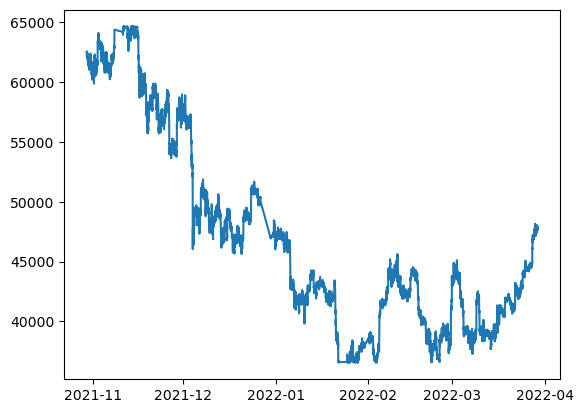

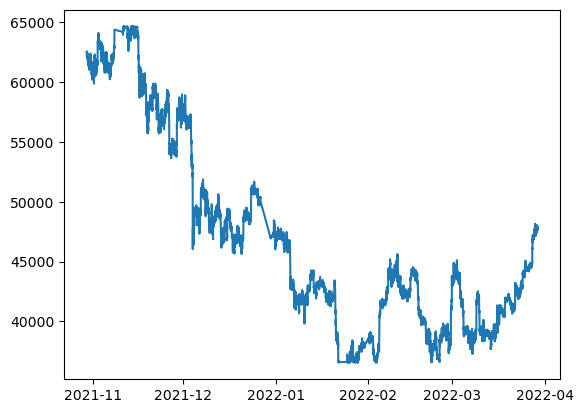

In [55]:
plt.plot(df_15_min.index, df_15_min['close_1min'] )
plt.show()

In [56]:
n_steps = 15
X, y = utils.split_sequence(df_15_min['close_1min'], n_steps)
X

array([[62561.86, 62531.42, 62516.47, ..., 62374.66, 62429.92, 62461.86],
       [62531.42, 62516.47, 62385.18, ..., 62429.92, 62461.86, 62440.37],
       [62516.47, 62385.18, 62397.57, ..., 62461.86, 62440.37, 62480.44],
       ...,
       [47567.22, 47617.48, 47653.42, ..., 47603.68, 47744.4 , 47708.53],
       [47617.48, 47653.42, 47731.79, ..., 47744.4 , 47708.53, 47799.42],
       [47653.42, 47731.79, 47878.72, ..., 47708.53, 47799.42, 47874.67]])

array([[62561.86, 62531.42, 62516.47, ..., 62374.66, 62429.92, 62461.86],
       [62531.42, 62516.47, 62385.18, ..., 62429.92, 62461.86, 62440.37],
       [62516.47, 62385.18, 62397.57, ..., 62461.86, 62440.37, 62480.44],
       ...,
       [47567.22, 47617.48, 47653.42, ..., 47603.68, 47744.4 , 47708.53],
       [47617.48, 47653.42, 47731.79, ..., 47744.4 , 47708.53, 47799.42],
       [47653.42, 47731.79, 47878.72, ..., 47708.53, 47799.42, 47874.67]])

In [57]:
train_X, train_y, valid_X, valid_y, _, _ = utils.train_test_valid_split(
        X,
        y,
        train_size=0.8,
        valid_size=0.1
    )
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
# print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
11005
11005
1375
1375
1377
1377
----------------------------------------
----------------------------
-------- Train X: (11005, 15), Train y: (11005,) --------
-------- Valid X: (1375, 15), Valid y: (1375,) --------
----------------------------

-------- train test valid split --------
11005
11005
1375
1375
1377
1377
----------------------------------------
----------------------------
-------- Train X: (11005, 15), Train y: (11005,) --------
-------- Valid X: (1375, 15), Valid y: (1375,) --------
----------------------------



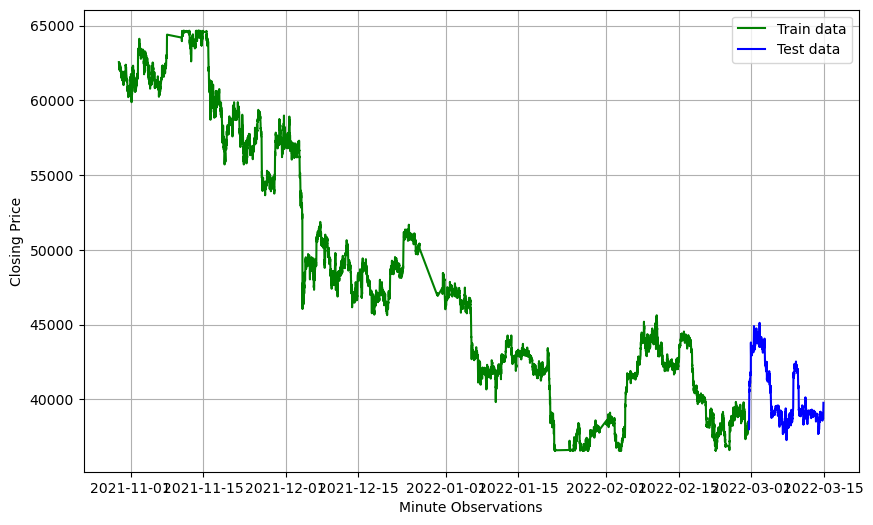

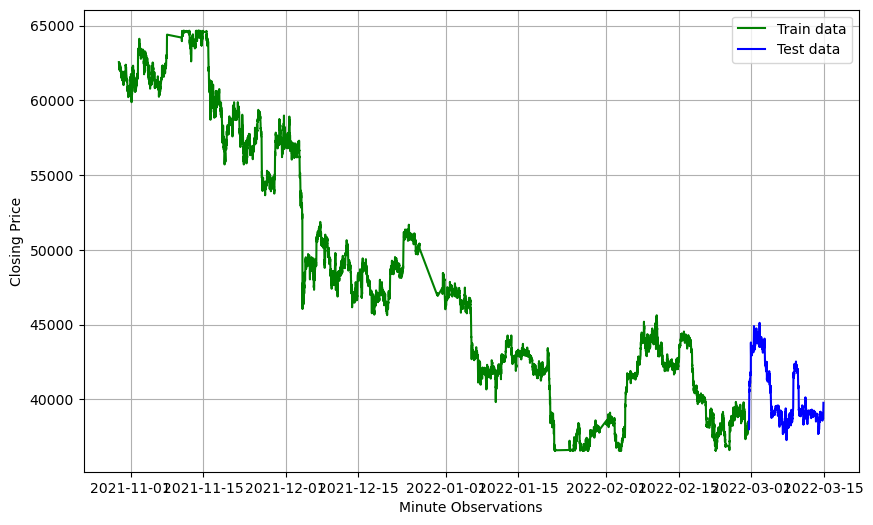

In [58]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(df_15_min[0:len(train_y)]["close_1min"], 'green', label='Train data')
plt.plot(df_15_min[len(train_y):len(train_y)+len(valid_y)]["close_1min"], 'blue', label='Test data')
plt.legend()

In [59]:
# Fit the ARIMA model to the training data
model = sm.tsa.ARIMA(df_15_min["close_1min"], order=(4,1,0))
results = model.fit()

/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471

In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             close_1min   No. Observations:                13772
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -89750.995
Date:                Sat, 07 Jan 2023   AIC                         179511.990
Time:                        23:21:27   BIC                         179549.641
Sample:                             0   HQIC                        179524.534
                              - 13772                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0312      0.004     -7.361      0.000      -0.040      -0.023
ar.L2          0.0096      0.004      2.183      0.029       0.001       0.018
ar.L3         -0.0124      0.006     -2.068      0.039      -0.024      -0.001
ar.L4       9.216e-05      0.006      0.016      0.987      -0.011       0.011
sigma2      2.683e+04     90.471    296.526      0.000    2.66e+04     2.7e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            515682.91
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             close_1min   No. Observations:                13772
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -89750.995
Date:                Sat, 07 Jan 2023   AIC                         179511.990
Time:                        23:22:00   BIC                         179549.641
Sample:                             0   HQIC                        179524.534
                              - 13772                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0312      0.004     -7.361      0.000      -0.040      -0.023
ar.L2          0.0096      0.004      2.183      0.029       0.001       0.018
ar.L3         -0.0124      0.006     -2.068      0.039      -0.024      -0.001
ar.L4       9.216e-05      0.006      0.016      0.987      -0.011       0.011
sigma2      2.683e+04     90.471    296.526      0.000    2.66e+04     2.7e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            515682.91
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
predictions = results.predict(start=len(train_X), end=(len(df_15_min)-1))

In [62]:
# calculating prediction error.
# calculate RMSE
rmse = sqrt(mean_squared_error(df_15_min[len(train_X):len(df_15_min)]['close_1min'], predictions))
print('RNSE error = %.3f ' %rmse)

RNSE error = 148.817 
RNSE error = 148.817 


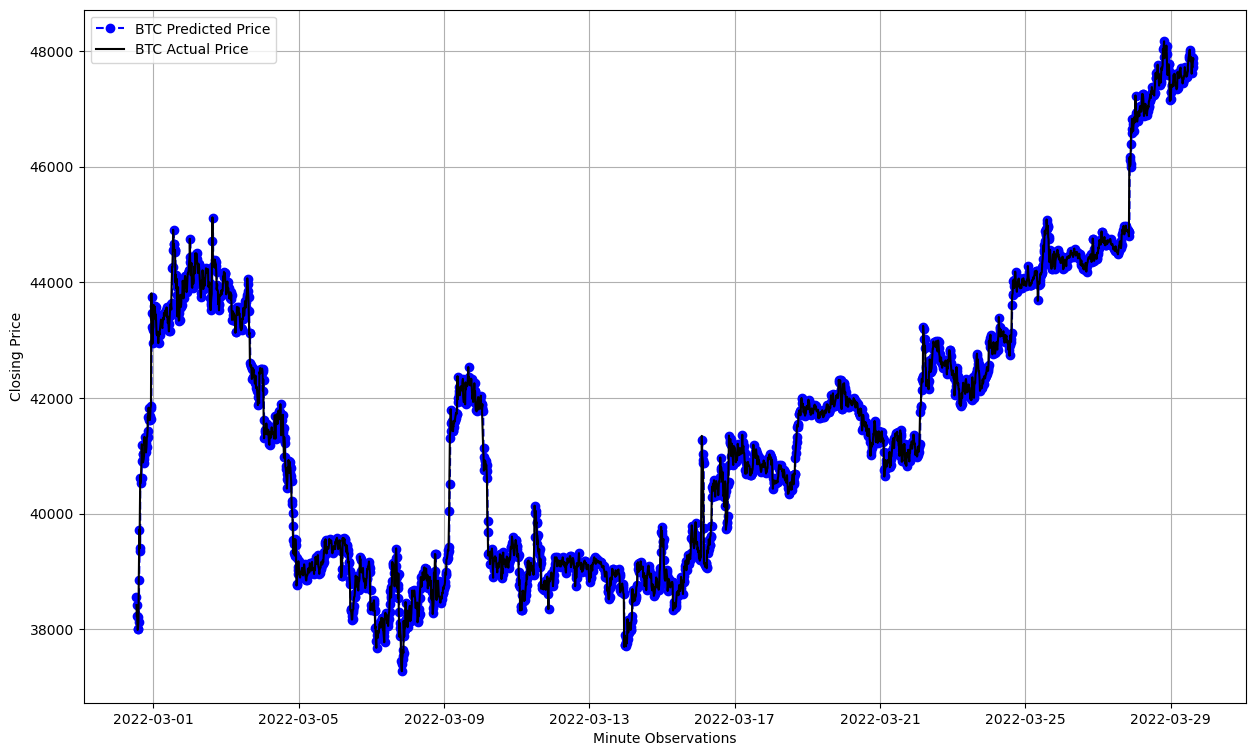

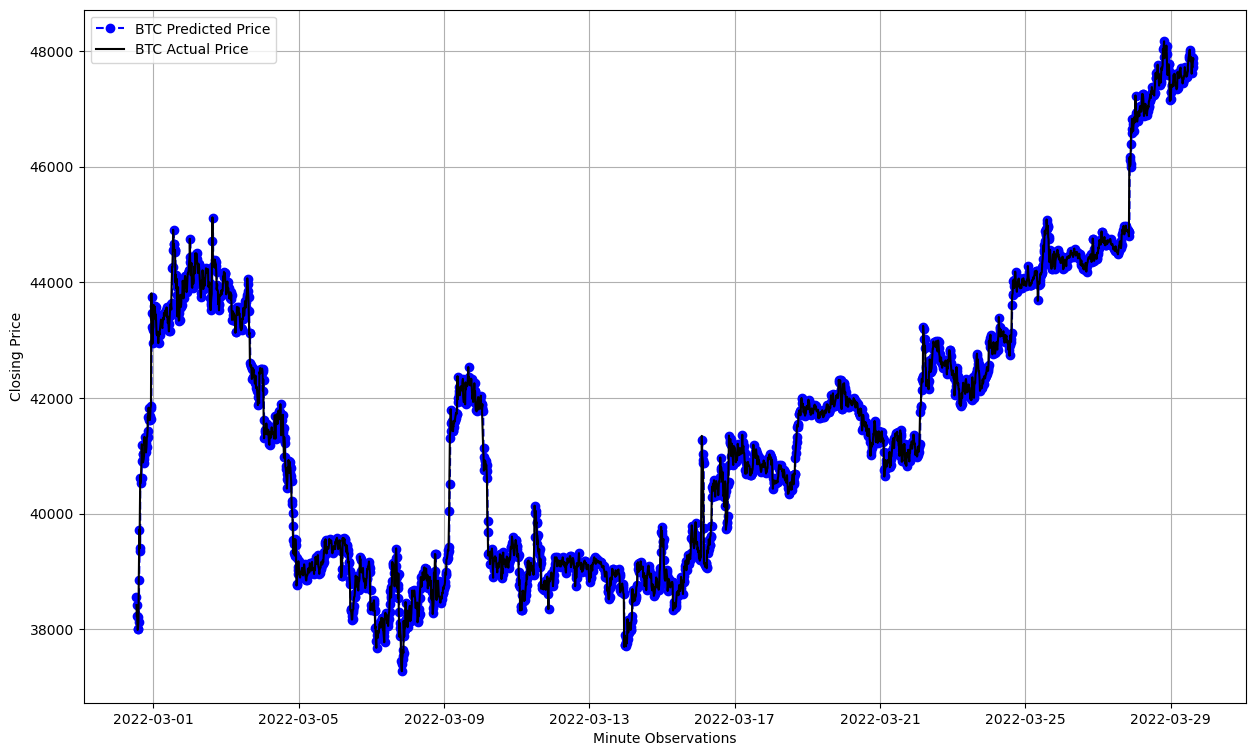

In [63]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df_15_min[len(train_y):len(train_y)+len(valid_y)].index

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(predictions, color='blue', marker="o", linestyle="dashed", label='BTC Predicted Price')
plt.plot(df_15_min[len(train_X):len(df_15_min)]['close_1min'], 'black', label='BTC Actual Price')
plt.legend()

In [64]:
df_60_min = df[::60]
df_60_min

,Unnamed: 0,_id,high_24h,last_24h,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 17:09:28,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,62559.74,60908.08,5113.537402,56425.00,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
2021-10-29 18:09:54,60,627127fabbd592fa2c7f25e5,62971.54,62397.10,62394.14,60962.99,5204.297994,56425.00,62404.25,60608.95,62407.86,3.846862,62368.24,62397.57,62385.41,21000000.0,18858012.0,18858012.0,62376.389918,4.263720e+10,4.0919,-0.280623,1.947506,2.811090,26.873643,29.034676,49.972913,1.176295e+12,43.4826,1.309904e+12,0.044513
2021-10-29 19:07:24,120,627127fabbd592fa2c7f2621,62971.54,62123.32,62110.79,61347.36,4476.700494,59542.11,62124.20,60608.95,62123.32,0.003650,62118.99,62123.32,62118.99,21000000.0,18858125.0,18858125.0,62111.423525,3.865841e+10,-12.9838,-0.502020,3.646022,2.854153,26.873643,27.902601,49.983726,1.171305e+12,43.4826,1.304340e+12,0.163515
2021-10-29 20:11:43,180,627127fabbd592fa2c7f265d,62971.54,62359.36,62350.16,61408.04,4408.004663,60154.53,62359.36,60608.95,62380.94,0.532779,62340.30,62374.66,62380.94,21000000.0,18858212.0,18858212.0,62366.249249,3.727366e+10,-18.5644,0.375498,0.439496,1.973032,26.873643,28.332142,49.849687,1.176116e+12,43.4826,1.309691e+12,0.000000
2021-10-29 21:10:05,240,627127fabbd592fa2c7f2699,62971.54,62480.44,62463.78,61413.17,4217.489249,60154.53,62480.44,60608.95,62480.44,0.000000,62480.44,62480.44,62480.44,21000000.0,18858212.0,18858212.0,62453.486661,3.676042e+10,-20.7817,0.114540,2.278869,2.628106,26.873643,28.708223,49.937448,1.177761e+12,43.4826,1.311523e+12,0.086260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29 10:16:54,206280,627127ffbbd592fa2c824b71,48234.00,47552.35,47537.73,47588.96,2164.236991,46897.00,47546.99,47152.38,47552.35,0.005280,47552.35,47552.35,47552.35,21000000.0,18997112.0,18997112.0,47553.425514,3.511657e+10,-3.4909,-0.260349,0.863809,11.826781,21.753626,30.323448,-0.780261,9.033778e+11,41.9428,9.986219e+11,0.135572
2022-03-29 11:21:32,206340,627127ffbbd592fa2c824bad,48234.00,47674.34,47653.42,47606.32,2101.286747,46897.00,47671.09,47152.38,47685.30,0.029528,47653.42,47653.42,47674.34,21000000.0,18997112.0,18997112.0,47690.826626,3.499902e+10,-5.6562,0.337678,1.054571,11.243553,21.252964,30.753092,0.051062,9.059880e+11,41.9238,1.001507e+12,0.000000
2022-03-29 12:17:02,206400,627127ffbbd592fa2c824be9,48234.00,48020.40,47995.74,47629.20,2174.483010,46897.00,48020.46,47152.38,47980.00,0.000000,47980.00,47980.00,47980.00,21000000.0,18997168.0,18997168.0,47950.858377,3.579124e+10,-4.8753,0.555396,1.429614,11.762772,21.519590,31.245459,2.003042,9.109305e+11,41.9279,1.006968e+12,0.380745


,Unnamed: 0,_id,high_24h,last_24h,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 17:09:28,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,62559.74,60908.08,5113.537402,56425.00,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
2021-10-29 18:09:54,60,627127fabbd592fa2c7f25e5,62971.54,62397.10,62394.14,60962.99,5204.297994,56425.00,62404.25,60608.95,62407.86,3.846862,62368.24,62397.57,62385.41,21000000.0,18858012.0,18858012.0,62376.389918,4.263720e+10,4.0919,-0.280623,1.947506,2.811090,26.873643,29.034676,49.972913,1.176295e+12,43.4826,1.309904e+12,0.044513
2021-10-29 19:07:24,120,627127fabbd592fa2c7f2621,62971.54,62123.32,62110.79,61347.36,4476.700494,59542.11,62124.20,60608.95,62123.32,0.003650,62118.99,62123.32,62118.99,21000000.0,18858125.0,18858125.0,62111.423525,3.865841e+10,-12.9838,-0.502020,3.646022,2.854153,26.873643,27.902601,49.983726,1.171305e+12,43.4826,1.304340e+12,0.163515
2021-10-29 20:11:43,180,627127fabbd592fa2c7f265d,62971.54,62359.36,62350.16,61408.04,4408.004663,60154.53,62359.36,60608.95,62380.94,0.532779,62340.30,62374.66,62380.94,21000000.0,18858212.0,18858212.0,62366.249249,3.727366e+10,-18.5644,0.375498,0.439496,1.973032,26.873643,28.332142,49.849687,1.176116e+12,43.4826,1.309691e+12,0.000000
2021-10-29 21:10:05,240,627127fabbd592fa2c7f2699,62971.54,62480.44,62463.78,61413.17,4217.489249,60154.53,62480.44,60608.95,62480.44,0.000000,62480.44,62480.44,62480.44,21000000.0,18858212.0,18858212.0,62453.486661,3.676042e+10,-20.7817,0.114540,2.278869,2.628106,26.873643,28.708223,49.937448,1.177761e+12,43.4826,1.311523e+12,0.086260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29 10:16:54,206280,627127ffbbd592fa2c824b71,48234.00,47552.35,47537.73,47588.96,2164.236991,46897.00,47546.99,47152.38,47552.35,0.005280,47552.35,47552.35,47552.35,21000000.0,18997112.0,18997112.0,47553.425514,3.511657e+10,-3.4909,-0.260349,0.863809,11.826781,21.753626,30.323448,-0.780261,9.033778e+11,41.9428,9.986219e+11,0.135572
2022-03-29 11:21:32,206340,627127ffbbd592fa2c824bad,48234.00,47674.34,47653.42,47606.32,2101.286747,46897.00,47671.09,47152.38,47685.30,0.029528,47653.42,47653.42,47674.34,21000000.0,18997112.0,18997112.0,47690.826626,3.499902e+10,-5.6562,0.337678,1.054571,11.243553,21.252964,30.753092,0.051062,9.059880e+11,41.9238,1.001507e+12,0.000000
2022-03-29 12:17:02,206400,627127ffbbd592fa2c824be9,48234.00,48020.40,47995.74,47629.20,2174.483010,46897.00,48020.46,47152.38,47980.00,0.000000,47980.00,47980.00,47980.00,21000000.0,18997168.0,18997168.0,47950.858377,3.579124e+10,-4.8753,0.555396,1.429614,11.762772,21.519590,31.245459,2.003042,9.109305e+11,41.9279,1.006968e+12,0.380745


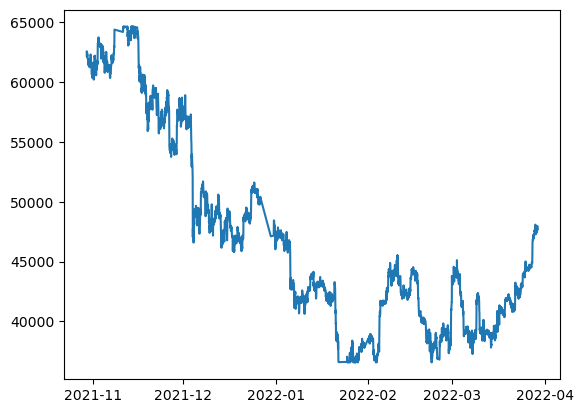

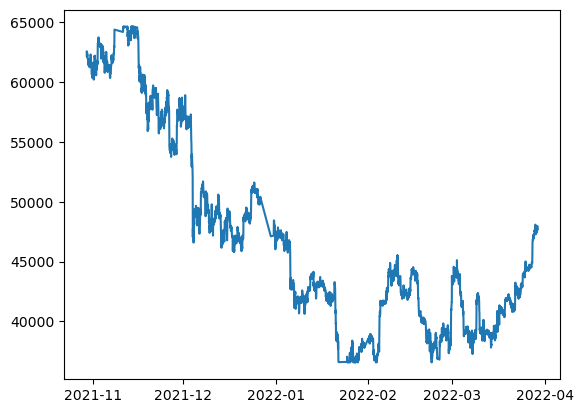

In [65]:
plt.plot(df_60_min.index, df_60_min['close_1min'] )
plt.show()

In [66]:
n_steps = 15
X, y = utils.split_sequence(df_60_min['close_1min'], n_steps)
X

array([[62561.86, 62397.57, 62123.32, ..., 61626.1 , 61516.62, 61683.53],
       [62397.57, 62123.32, 62374.66, ..., 61516.62, 61683.53, 61531.11],
       [62123.32, 62374.66, 62480.44, ..., 61683.53, 61531.11, 61383.  ],
       ...,
       [48089.92, 47642.15, 47578.73, ..., 47716.91, 47552.35, 47653.42],
       [47642.15, 47578.73, 47301.08, ..., 47552.35, 47653.42, 47980.  ],
       [47578.73, 47301.08, 47392.23, ..., 47653.42, 47980.  , 47858.52]])

array([[62561.86, 62397.57, 62123.32, ..., 61626.1 , 61516.62, 61683.53],
       [62397.57, 62123.32, 62374.66, ..., 61516.62, 61683.53, 61531.11],
       [62123.32, 62374.66, 62480.44, ..., 61683.53, 61531.11, 61383.  ],
       ...,
       [48089.92, 47642.15, 47578.73, ..., 47716.91, 47552.35, 47653.42],
       [47642.15, 47578.73, 47301.08, ..., 47552.35, 47653.42, 47980.  ],
       [47578.73, 47301.08, 47392.23, ..., 47653.42, 47980.  , 47858.52]])

In [67]:
train_X, train_y, valid_X, valid_y, _, _ = utils.train_test_valid_split(
        X,
        y,
        train_size=0.8,
        valid_size=0.1
    )
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
# print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
2742
2742
342
342
344
344
----------------------------------------
----------------------------
-------- Train X: (2742, 15), Train y: (2742,) --------
-------- Valid X: (342, 15), Valid y: (342,) --------
----------------------------

-------- train test valid split --------
2742
2742
342
342
344
344
----------------------------------------
----------------------------
-------- Train X: (2742, 15), Train y: (2742,) --------
-------- Valid X: (342, 15), Valid y: (342,) --------
----------------------------



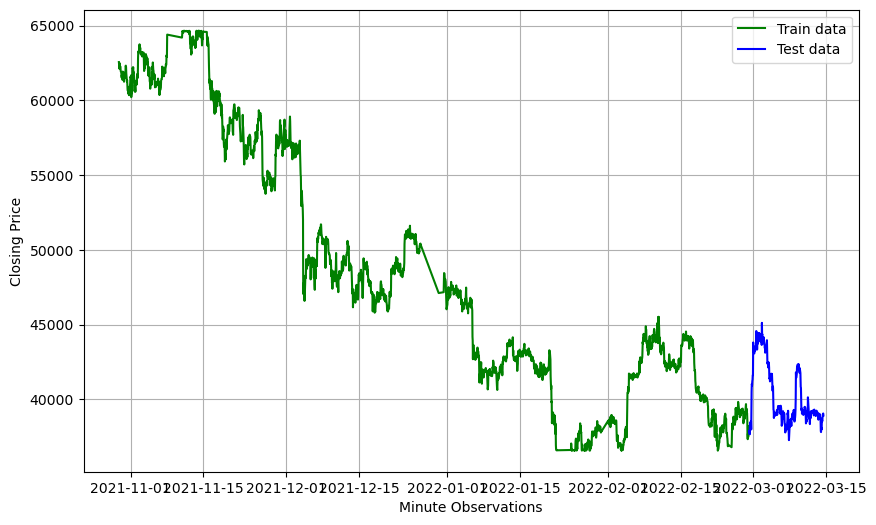

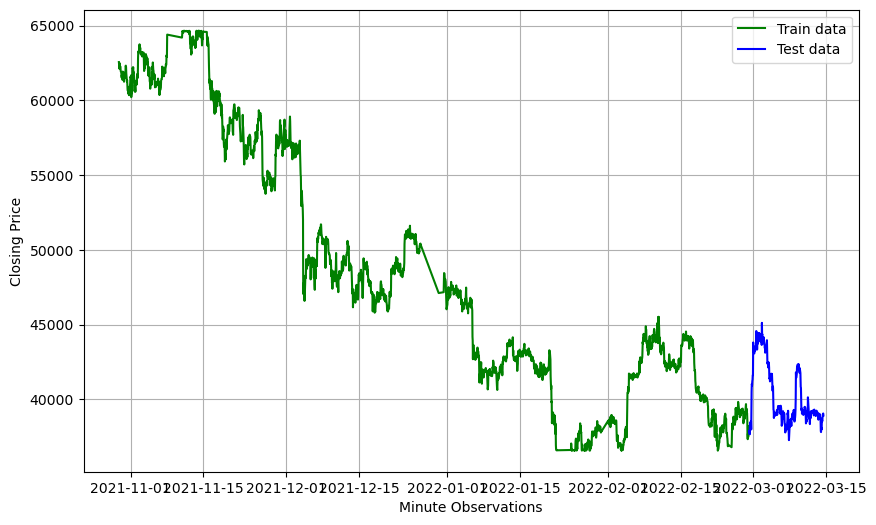

In [68]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(df_60_min[0:len(train_y)]["close_1min"], 'green', label='Train data')
plt.plot(df_60_min[len(train_y):len(train_y)+len(valid_y)]["close_1min"], 'blue', label='Test data')
plt.legend()

In [69]:
# Fit the ARIMA model to the training data
model = sm.tsa.ARIMA(df_60_min["close_1min"], order=(4,1,0))
results = model.fit()
results.summary()

/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             close_1min   No. Observations:                 3443
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -24808.010
Date:                Sat, 07 Jan 2023   AIC                          49626.020
Time:                        23:21:28   BIC                          49656.739
Sample:                             0   HQIC                         49636.993
                               - 3443                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0435      0.012     -3.495      0.000      -0.068      -0.019
ar.L2         -0.0011      0.012     -0.093      0.926      -0.024       0.022
ar.L3         -0.0159      0.015     -1.025      0.305      -0.046       0.014
ar.L4          0.0116      0.017      0.695      0.487      -0.021       0.044
sigma2      1.067e+05    779.358    136.877      0.000    1.05e+05    1.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             76456.86
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             close_1min   No. Observations:                 3443
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -24808.010
Date:                Sat, 07 Jan 2023   AIC                          49626.020
Time:                        23:22:01   BIC                          49656.739
Sample:                             0   HQIC                         49636.993
                               - 3443                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0435      0.012     -3.495      0.000      -0.068      -0.019
ar.L2         -0.0011      0.012     -0.093      0.926      -0.024       0.022
ar.L3         -0.0159      0.015     -1.025      0.305      -0.046       0.014
ar.L4          0.0116      0.017      0.695      0.487      -0.021       0.044
sigma2      1.067e+05    779.358    136.877      0.000    1.05e+05    1.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             76456.86
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
predictions = results.predict(start=len(train_X), end=(len(df_60_min)-1))
predictions

datetime
2022-02-28 03:31:17    38122.002590
2022-02-28 04:32:54    37876.935744
2022-02-28 05:33:28    37841.184556
2022-02-28 06:31:57    37923.338045
2022-02-28 07:33:28    37673.399648
                           ...     
2022-03-29 10:16:54    47710.940787
2022-03-29 11:21:32    47558.199100
2022-03-29 12:17:02    47645.735114
2022-03-29 13:17:35    47970.651895
2022-03-29 14:20:16    47859.944646
Name: predicted_mean, Length: 701, dtype: float64

datetime
2022-02-28 03:31:17    38122.002590
2022-02-28 04:32:54    37876.935744
2022-02-28 05:33:28    37841.184556
2022-02-28 06:31:57    37923.338045
2022-02-28 07:33:28    37673.399648
                           ...     
2022-03-29 10:16:54    47710.940787
2022-03-29 11:21:32    47558.199100
2022-03-29 12:17:02    47645.735114
2022-03-29 13:17:35    47970.651895
2022-03-29 14:20:16    47859.944646
Name: predicted_mean, Length: 701, dtype: float64

In [71]:
# calculating prediction error.
# calculate RMSE
rmse = sqrt(mean_squared_error(df_60_min[len(train_X):len(df_60_min)]['close_1min'], predictions))
print('RNSE error = %.3f ' %rmse)

RNSE error = 301.808 
RNSE error = 301.808 


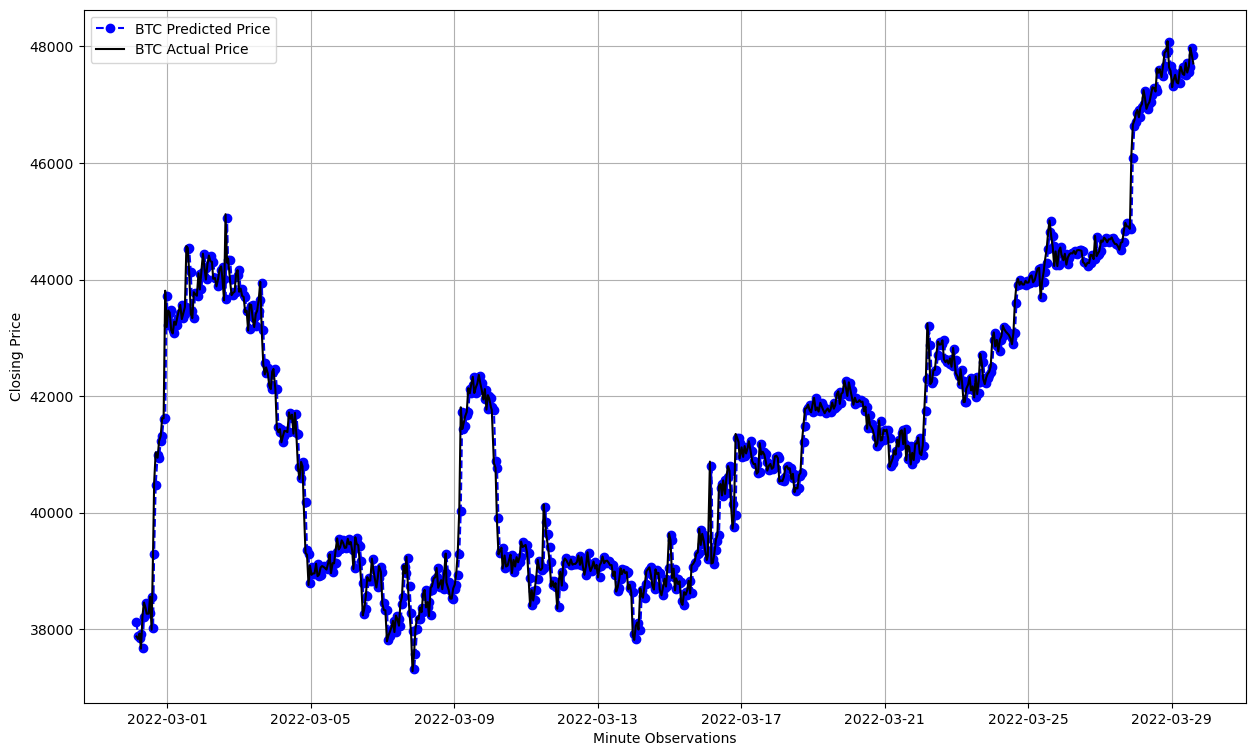

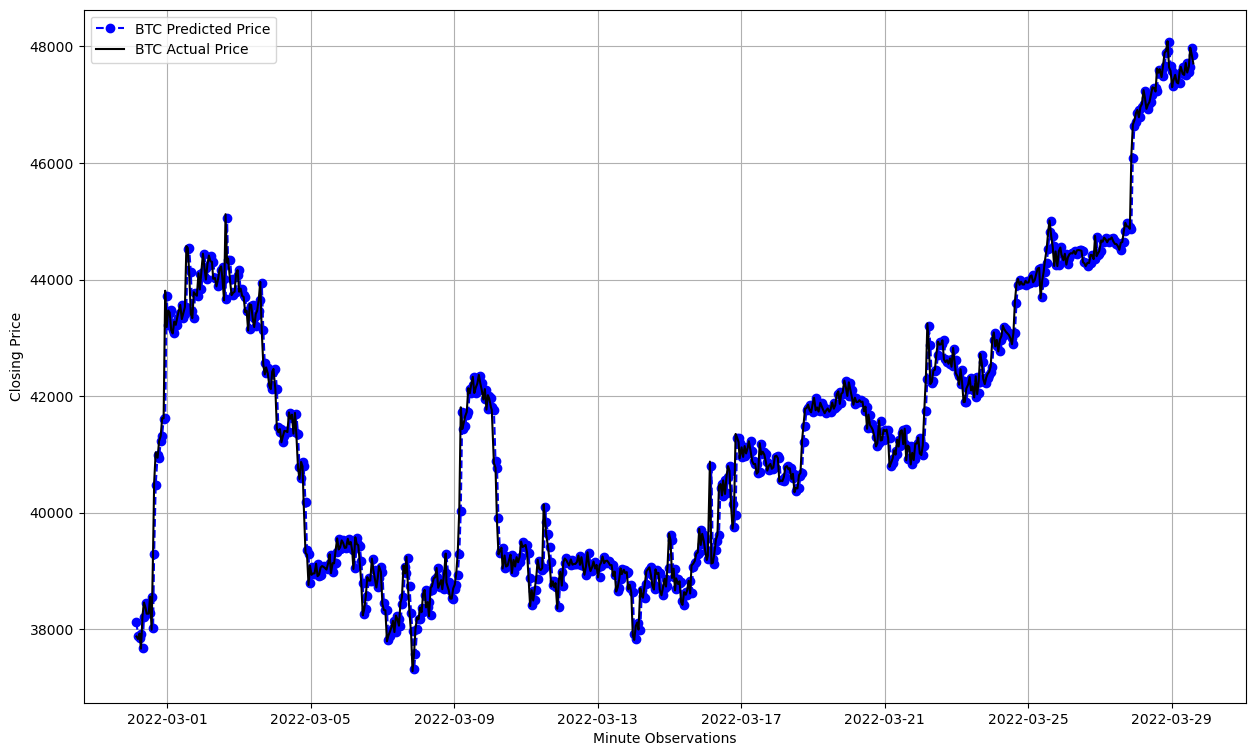

In [72]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df_60_min[len(train_y):len(train_y)+len(valid_y)].index

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(predictions, color='blue', marker="o", linestyle="dashed", label='BTC Predicted Price')
plt.plot(df_60_min[len(train_X):len(df_60_min)]['close_1min'], 'black', label='BTC Actual Price')
plt.legend()